# General Outline
1. Introduction
    1. Introduce the way things are: reports of tweets causing stock change
    2. What could be: what if we are able to predict those changes based off the tweet?
2. Body
    1. Go back to the problem, 
    2. Use the text features to predict the stock movement
    3. Need to 
    

# Craft the Beginning

What is: We fell short of our Q3 financial goals partly because we’re understaffed and everyone’s spread too thin.

What could be: But what if we could solve the worst of our problems by bringing in a couple of powerhouse clients? Well, we can.

# Develop the Middle

Let’s go back to that Q3 update. Revenues are down, but you want to motivate employees to make up for it. Here’s one way you could structure the middle of your presentation:

What is: We missed our Q3 forecast by 15%.

What could be: Q4 numbers must be strong for us to pay out bonuses.

What is: We have six new clients on our roster.

What could be: Two of them have the potential to bring in more revenue than our best clients do now.

What is: The new clients will require extensive retooling in manufacturing.

What could be: We’ll be bringing in experts from Germany to help.

As you move back and forth between what is and what could be, the audience will find the latter more and more alluring.

# 1. Introduction

On May 1st, 2020, at precisely 11:11 am EST, Elon Musk decided to tweet. \"Tesla stock price is too high imo\". The share price that was standing at \\$760 on 11:15 am dropped to the day's low of \\$702 on 11:40 am, losing roughly 7% of its value within minutes (\\$14B in value) https://www.bbc.com/news/business-52504187

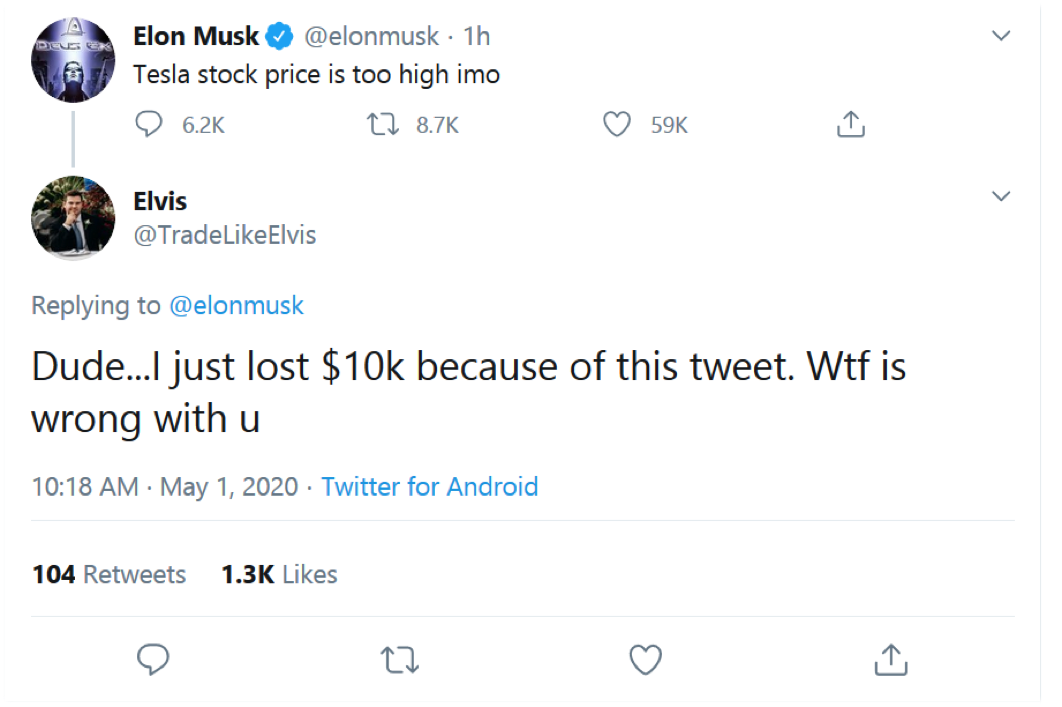

Highly influential individuals can, and have, voiced their opinions on the market through various social media platforms, causing prices to rise or fall within minutes of posting. Earlier in 2018, Elon Musk was charged securities fraud for misleading tweets about potentially taking Tesla private (https://www.sec.gov/news/press-release/2018-219). The tweet in question: \"Am considering taking Tesla private at \\$420. Funding secured.\" Resulted in the charges, and a \\$40M fine, Musk losing his chair at Tesla, and an 11% increase of Tesla's stock price at the day's close (https://www.nytimes.com/2018/08/07/business/tesla-stock-elon-musk-private.html).


Many have claimed this to be outright market manipulation, calling for regulators to get involved (https://www.cnbc.com/2021/01/29/elon-musks-tweets-are-moving-markets.html). Nonetheless, until greater federal action is taken, company CEOs are going to continue to tweet their personal thoughts on a variety of topics, including those that may directly impact their company's stock price. 

## Audience 

With the freely and instantly accessible information available today, many investing strategies have to rely on rapid analysis of social media to alert them to potential market changes. The rapid market changes from these tweets has caused investors to be fixated on monitoring social media for similar occurrences.

Anthony Cheung, Head of Market Analysis at AmplifyME, describes how important Twitter is for looking for "rumors" concering stock market changes (https://www.youtube.com/watch?v=EWKJprUrnPE). However, as one can spend hours scouring through Twitter posts looking for indications of an imminent market change, it makes it difficult to adapt to market fluctuations that happen in minutes. 

In response to this, I wanted to see if it was possible to build a model that would make rapid market change predictions by using the Tweets posted by company CEOs. This would serve as a tool for investors that can identify significant, upcoming market changes.

## Collecting the Data

In order to make accurate predictions, the model needs enough historical data to be able to identify patterns that are indicative of stock movement. As I was limited to a maximum of 5 years of Yahoo Finance stock data, I obtained Twitter data using Twint for company executives that had at least 1000 tweets within those 5 years. The following table summarizes the chosen CEOs and their companies.


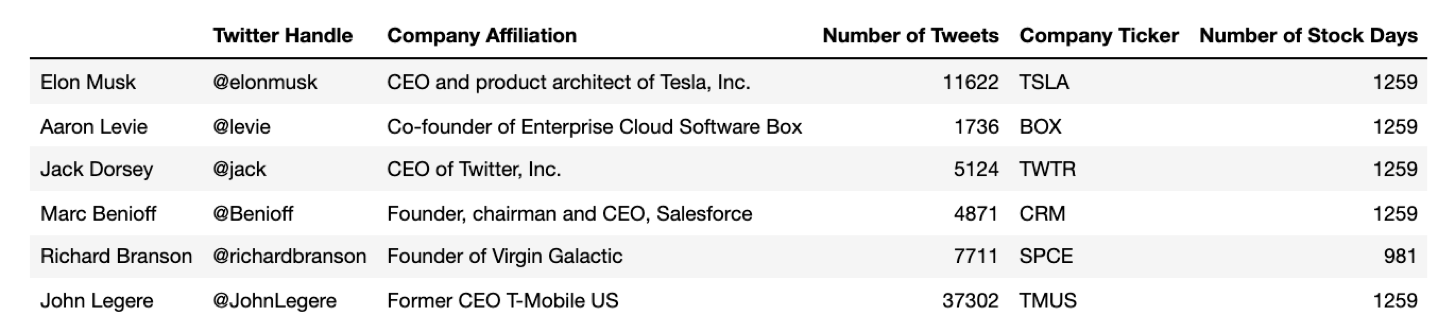

5-years of stock data were collected from Yahoo! finance for 6 companies between August 23rd, 2016 to July 20th, 2021 with the exception of SPCE (Virgin Galactic) where the earliest public stock price is September 29th, 2017.
Twitter data was collected over the same time period belonging to tech executives of each companies. Altogether, 66,714 Twitter posts were collect over 1,792 days for the following executives and companies.




## Getting the Data into a Usable Format


The number of links, mentions, hashtags, and photos and/or videos were counted for each tweet. Additional features from the tweet were engineered, such as the number of sentences in a tweet, the number of words, and average words per sentence as well as features derived from the NLP tool, spaCy, like number of nouns, verbs, and mentions or an organization like Twitter or Tesla. The tweets were organized into Pandas DataFrames containing the raw text and the  counts for each feature generated from the tweet.

As we are hypothesizing that tweets will have an impact on the opening or closing stock price, posts were grouped together based off this hypothesis, i.e. tweets that occur between 9:30 am and 4:00 pm on a weekday were grouped together with the assumption they would impact that day's closing price. While this unfortunately can introduce noise into the collected data (not every tweet is going to impact the stock), the hope is that the model will be able to parse out the relevent information from the collected posts. 

The opening and closing stock prices were combined into a single dataframe. Stock prices were converted to the percent change between the open and closing prices (the stock's return). The stock returns were merged with the collected tweets. 

# 2. Getting the Data into a Workable Format

When it comes to working with data, the first step needed to be taken is examining and tailoring the data to fit your questions and needs. Below are some of the issues I dealt with when working with this data set.  

1. Mismatched Rating Scales:  

In total there were four scales: Aroma, Palate, Taste, Appearance and Overall. Aroma and Taste were on a scale of 10, Palate and Appearance were on a scale of 5 and Overall was unknown. To remedy this, I adjusted each rating to a 5-point scale. Then I created a new "Overall" rating by averaging the four sensory ratings.  

2. Non-English Text Reviews  

Some of the text reviews were not in English and this is an issue when using NLP because it can throw the model off by the non-English words. Using lang detect, I searched through the data and dropped any rows of data that were not identified as English.  

3. Text Preprocessing for User Reviews  

Text reviews have a bunch of miscellaneous information such as spelling errors, punctuation, contractions, capitalization, whitespace, etc. that is not needed. In addition, words can be in different verb tenses. For example the word play can be written as played, playing, plays. Since I only care about the base word, I used a process known as lemmatization to derive the base of each word. Lastly, there are common words that can be found in many reviews that do not help in creating insight within the model known as stopwords. To remove all of these from the text I created a pipeline to clean the text and prep it for analysis and machine learning.  

Steps taken to get the data ready for EDA and machine learning:

1. Combining stock open and close days into a single data frame, converting to percent change (returns).


2. Selecting tweet features and converting to feature counts. 


3. Grouping Tweets by upcoming stock price.


4. Combining Tweet and Stock Dataframes by date



# 3. Exploratory Data Analysis

## Plots

In total there were 5 rating scales. I chose to focus on the "Overall" rating because it was an average of the rest. Along with examining the entire data set I selected five beers by length of data and style of beer to examine. You can see in the figure below that majority of reviews fell between 3 and 4 star ratings on the 5-point scale. The black line represents the median and the white square represents the mean. Moving forward I decided to split the Overall rating into a binary grouping. Anything lower than a 3.5 star rating was considered to be "low" and the rest were considered to be "high".

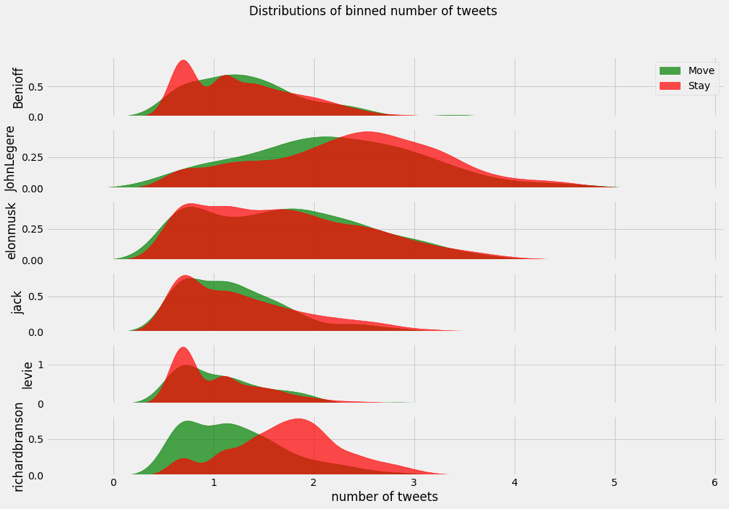


## Heatmap

As mentioned previously, the main feature for the model was the text reviews. I decided to explore these reviews using word frequency plots and the predicted probabilities a given word or phrase would be considered a "high" or "low" overall rating.
First, the word frequency plot showed sensory words to describe beers such as "sweet", "light" and "caramel". There are also words in relation to beer such as "hops" and "head" (in reference to the foam at the top of a beer). A surprising word to see was "not" because it can change the polarity of a sentence. For example the sentence, "This is good", can change from positive to negative by adding the word not, "This is not good". To account for this I went back to edit the stopwords to ignore the words "no" and "not". You can see the 25 most frequent words in the plot below.

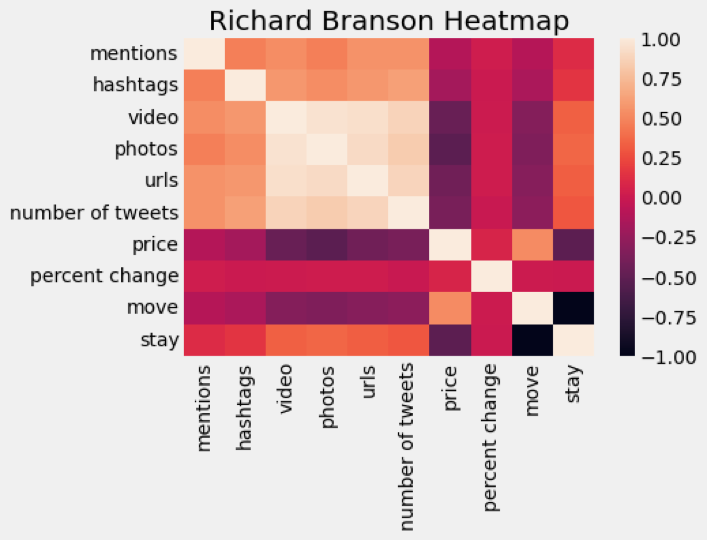

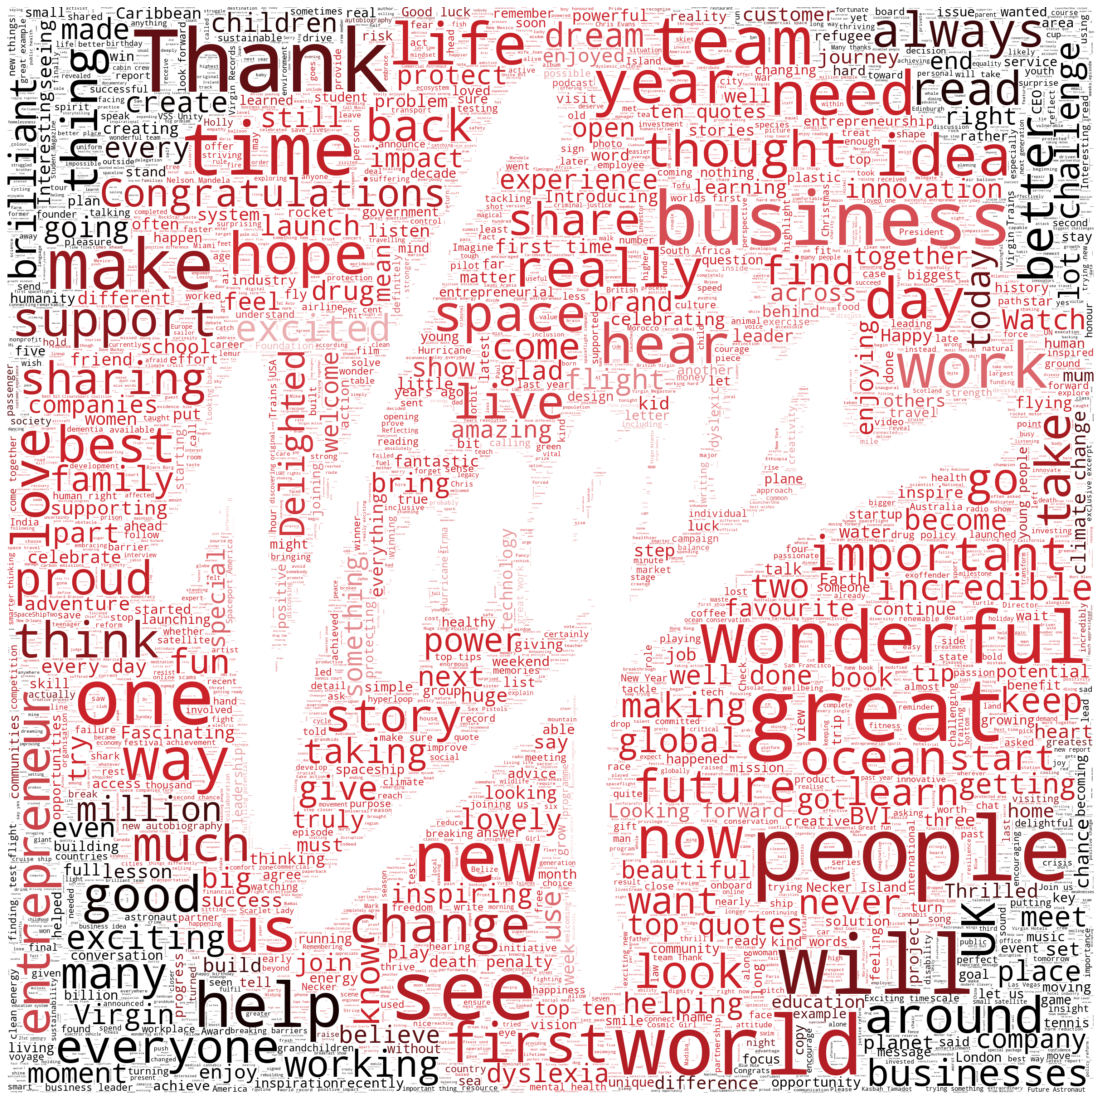